In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

df = pd.read_csv('example1.dat', sep=",", header=None)
edges = [frozenset(x) for x in df.to_numpy() if x[0]!=x[1]]
edge_tuples = [tuple(x) for x in df.to_numpy()]     #all edges are distinct and have no self loops

In [2]:
edge_tuples

[(1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (8, 9),
 (8, 10),
 (8, 5),
 (8, 11),
 (8, 12),
 (13, 14),
 (13, 15),
 (13, 16),
 (13, 17),
 (13, 18),
 (13, 19),
 (20, 21),
 (20, 22),
 (20, 23),
 (20, 24),
 (20, 25),
 (26, 27),
 (26, 28),
 (26, 29),
 (26, 30),
 (26, 31),
 (26, 32),
 (26, 33),
 (34, 15),
 (34, 16),
 (34, 35),
 (34, 23),
 (21, 36),
 (21, 37),
 (21, 38),
 (21, 23),
 (21, 25),
 (2, 39),
 (2, 40),
 (2, 10),
 (2, 41),
 (2, 11),
 (2, 42),
 (43, 13),
 (43, 44),
 (43, 45),
 (43, 36),
 (43, 15),
 (43, 46),
 (43, 47),
 (43, 11),
 (48, 26),
 (48, 29),
 (48, 31),
 (48, 49),
 (48, 50),
 (48, 51),
 (48, 52),
 (9, 40),
 (9, 53),
 (9, 10),
 (9, 3),
 (27, 26),
 (27, 16),
 (27, 54),
 (27, 46),
 (27, 55),
 (27, 25),
 (56, 14),
 (56, 18),
 (56, 57),
 (56, 58),
 (59, 13),
 (59, 15),
 (59, 60),
 (59, 4),
 (59, 61),
 (62, 26),
 (62, 15),
 (62, 63),
 (62, 64),
 (65, 13),
 (65, 15),
 (65, 18),
 (65, 11),
 (66, 9),
 (66, 40),
 (66, 67),
 (66, 12),
 (68, 53),
 (68, 57),
 (68, 41),
 (68, 69)

In [24]:
graph = nx.from_pandas_edgelist(df,0,1)
#graph.edges
#graph.nodes

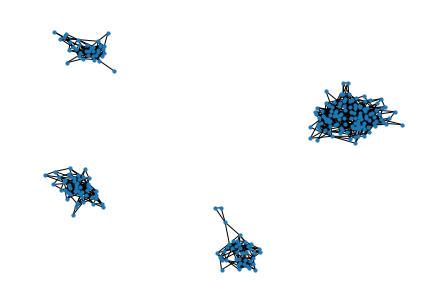

In [11]:
nx.draw(graph,node_size=10)
plt.show()

In [25]:
A = np.array(nx.adjacency_matrix(graph).todense())
#A.shape
A

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
D = np.diag(np.sum(A, axis=1)) #0 or 1 because it is symmetrical
D

array([[7, 0, 0, ..., 0, 0, 0],
       [0, 8, 0, ..., 0, 0, 0],
       [0, 0, 9, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 5, 0],
       [0, 0, 0, ..., 0, 0, 2]])

In [27]:
Dsqrt = np.sqrt(D)
Dfinal = np.linalg.inv(Dsqrt)
L = np.dot(Dfinal,np.dot(A,Dfinal))
L

array([[0.        , 0.13363062, 0.12598816, ..., 0.        , 0.        ,
        0.        ],
       [0.13363062, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.12598816, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [28]:
eigenvalues, eigenvectors = np.linalg.eigh(L)  #eigh will return sorted eigenvalues and is faster because it takes
                                                #advantage of the symmetry of the matrix
eigenvalues

array([-5.93066504e-01, -5.85441209e-01, -5.83588708e-01, -5.61678808e-01,
       -5.55254112e-01, -5.45678990e-01, -5.40801767e-01, -5.39093724e-01,
       -5.28095146e-01, -5.25412615e-01, -5.22867997e-01, -5.18072784e-01,
       -5.14265956e-01, -5.11843837e-01, -5.04602435e-01, -5.00000000e-01,
       -4.99012418e-01, -4.93254508e-01, -4.86373152e-01, -4.83569878e-01,
       -4.71795892e-01, -4.70955536e-01, -4.62486468e-01, -4.45857456e-01,
       -4.44671715e-01, -4.39150244e-01, -4.36743052e-01, -4.28241108e-01,
       -4.24861461e-01, -4.21702593e-01, -4.14499079e-01, -4.08929374e-01,
       -4.06397321e-01, -4.05207694e-01, -4.03743414e-01, -3.95146278e-01,
       -3.90914598e-01, -3.80580722e-01, -3.79956582e-01, -3.73745886e-01,
       -3.73648261e-01, -3.70551859e-01, -3.62963005e-01, -3.57994407e-01,
       -3.51877088e-01, -3.49939806e-01, -3.49137740e-01, -3.37803890e-01,
       -3.35768535e-01, -3.29412536e-01, -3.21913407e-01, -3.20975073e-01,
       -3.18278329e-01, -

In [29]:
lista = list(eigenvalues)
k = len(lista) - 1 - np.argmax([x - lista[i - 1] for i, x in enumerate(lista)][1:])  #we select k to be where the 
         # -1 because we check n-1 differences                                                                       eigengap is the biggest
#i substract from the number of eigenvalues because we want the largest eigenvalues and they are sorted with ascending
k

4

In [102]:
eigenvectors

array([[-0.11890939,  0.07466175,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1490032 , -0.03079576,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07389412, -0.06269009,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.08543577],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.13508581],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.08543577]])

In [104]:
#selected_eigenVectors = np.flip(eigenvectors[-k:])
sel_eigen = eigenvectors[:,-k:] #ordered as seen in eigenvectors
#selected_eigenVectors
sel_eigen

array([[ 0.0867576 ,  0.        ,  0.        ,  0.        ],
       [ 0.09274778,  0.        ,  0.        ,  0.        ],
       [ 0.09837388,  0.        ,  0.        ,  0.        ],
       [ 0.11359237,  0.        ,  0.        ,  0.        ],
       [ 0.11823068,  0.        ,  0.        ,  0.        ],
       [ 0.08032193,  0.        ,  0.        ,  0.        ],
       [ 0.04637389,  0.        ,  0.        ,  0.        ],
       [ 0.07332356,  0.        ,  0.        ,  0.        ],
       [ 0.12269378,  0.        ,  0.        ,  0.        ],
       [ 0.12700013,  0.        ,  0.        ,  0.        ],
       [ 0.13116517,  0.        ,  0.        ,  0.        ],
       [ 0.13116517,  0.        ,  0.        ,  0.        ],
       [ 0.12700013,  0.        ,  0.        ,  0.        ],
       [ 0.10369517,  0.        ,  0.        ,  0.        ],
       [ 0.16720344,  0.        ,  0.        ,  0.        ],
       [ 0.12269378,  0.        ,  0.        ,  0.        ],
       [ 0.09837388,  0.

In [106]:
Y = []
for i in sel_eigen:
    div = np.linalg.norm(i)   #by default norm2
    #print(div) 
    Y.append(i/div) 
Yfinal = np.array(Y)    


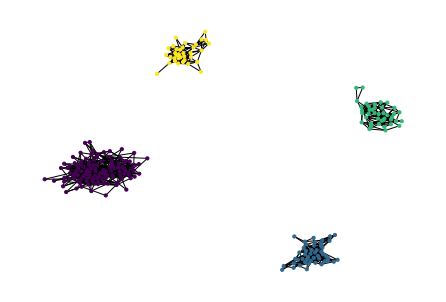

In [107]:
clusters = KMeans(n_clusters=k).fit(Yfinal)
labels = clusters.labels_
nx.draw(graph, node_size=10, node_color=labels)
plt.show()

# Part 2


In [2]:
df2 = pd.read_csv('example2.dat', sep=",", header=None)
df2

,0,1,2
0,2,1,1
1,9,1,1
2,12,1,1
3,18,1,1
4,20,1,1
...,...,...,...
2413,89,100,1
2414,91,100,1
2415,92,100,1
2416,96,100,1


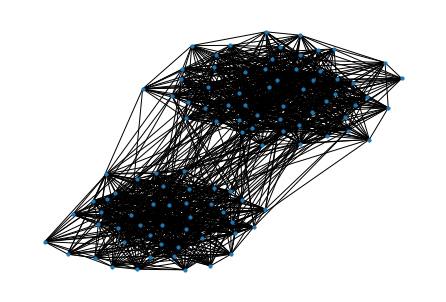

In [3]:
graph2 = nx.from_pandas_edgelist(df2,0,1)
nx.draw(graph2,node_size=10)
plt.show()

In [4]:
A2 = np.array(nx.adjacency_matrix(graph2).todense())
D2 = np.diag(np.sum(A2, axis=1))
Dsqrt2 = np.sqrt(D2)
Dfinal2 = np.linalg.inv(Dsqrt2)
L2 = np.dot(Dfinal2,np.dot(A2,Dfinal2))
eigenvalues2, eigenvectors2 = np.linalg.eigh(L2)

In [23]:
listb = list(eigenvalues2)
k2 = len(listb) - 1 - np.argmax([x - listb[i - 1] for i, x in enumerate(listb)][1:])
k2

2

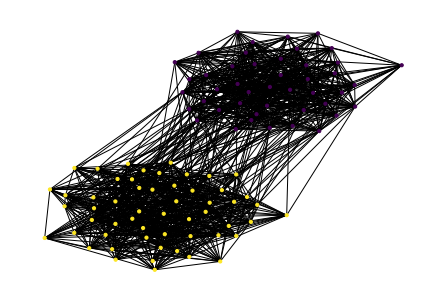

In [30]:
sel_eigen2 = eigenvectors2[:,-k2:]
Y2 = []
for i in sel_eigen2:
    div = np.linalg.norm(i)   #by default norm2
    #print(div) 
    Y2.append(i/div) 
Yfinal2 = np.array(Y2) 
clusters2 = KMeans(n_clusters=k2).fit(Yfinal2)
labels2 = clusters2.labels_
nx.draw(graph2, node_size=10, node_color=labels2)
plt.show()